<a href="https://colab.research.google.com/github/jacopoGH13/Jacopo/blob/main/SentimentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing libraries | Directory Changing | Dataset Upload | Dataset Description | Dataset Show**

In [ ]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
from sklearn.model_selection import train_test_split
import os
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob

from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import re
nltk.download('vader_lexicon')
import numpy as np

from scipy.stats import norm


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [ ]:
#change of directory

os.chdir(r'C:\Users\lenovo\Desktop\DS\llm-detect-ai-generated-text')

In [ ]:
#upload of the dataset

df = pd.read_csv(r'train_essays.csv')

In [ ]:
df

,id,prompt_id,text,generated
0,0059830c,0,Cars. Cars have been around since they became ...,0
1,005db917,0,Transportation is a large necessity in most co...,0
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0
3,00940276,0,How often do you ride in a car? Do you drive a...,0
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0
...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0
1375,ffa247e0,0,There's a new trend that has been developing f...,0
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0


In [ ]:
#mean length of the text

stat = df['text'].apply(len).mean()
print(stat)

3169.0507982583454


In [ ]:
#dataset description

df.describe()

,prompt_id,generated
count,1378.000000,1378.000000
mean,0.486212,0.002177
std,0.499991,0.046625
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


It's already clear that the dataset mainly contains **'Neutral'** texts.

In [ ]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

In [ ]:
#textblob tags

blob = TextBlob(df['text'][0])
print(blob.tags, blob.noun_phrases)

[('Cars', 'NNS'), ('Cars', 'NNS'), ('have', 'VBP'), ('been', 'VBN'), ('around', 'IN'), ('since', 'IN'), ('they', 'PRP'), ('became', 'VBD'), ('famous', 'JJ'), ('in', 'IN'), ('the', 'DT'), ('1900s', 'CD'), ('when', 'WRB'), ('Henry', 'NNP'), ('Ford', 'NNP'), ('created', 'VBD'), ('and', 'CC'), ('built', 'VBD'), ('the', 'DT'), ('first', 'JJ'), ('ModelT', 'NNP'), ('Cars', 'NNS'), ('have', 'VBP'), ('played', 'VBN'), ('a', 'DT'), ('major', 'JJ'), ('role', 'NN'), ('in', 'IN'), ('our', 'PRP$'), ('every', 'DT'), ('day', 'NN'), ('lives', 'VBZ'), ('since', 'IN'), ('then', 'RB'), ('But', 'CC'), ('now', 'RB'), ('people', 'NNS'), ('are', 'VBP'), ('starting', 'VBG'), ('to', 'TO'), ('question', 'VB'), ('if', 'IN'), ('limiting', 'JJ'), ('car', 'NN'), ('usage', 'NN'), ('would', 'MD'), ('be', 'VB'), ('a', 'DT'), ('good', 'JJ'), ('thing', 'NN'), ('To', 'TO'), ('me', 'PRP'), ('limiting', 'VBG'), ('the', 'DT'), ('use', 'NN'), ('of', 'IN'), ('cars', 'NNS'), ('might', 'MD'), ('be', 'VB'), ('a', 'DT'), ('good', 

- CC coordinating conjunction
- CD cardinal digit
- DT determiner
- EX existential there (like: “there is” … think of it like “there exists”)
- FW foreign word
- IN preposition/subordinating conjunction
- JJ adjective ‘big’
- JJR adjective, comparative ‘bigger’
- JJS adjective, superlative ‘biggest’
- LS list marker 1)
- MD modal could, will
- NN noun, singular ‘desk’
- NNS noun plural ‘desks’
- NNP proper noun, singular ‘Harrison’
- NNPS proper noun, plural ‘Americans’
- PDT predeterminer ‘all the kids’
- POS possessive ending parent‘s
- PRP personal pronoun I, he, she
- PRP$ possessive pronoun my, his, hers
- RB adverb very, silently,
- RBR adverb, comparative better
- RBS adverb, superlative best
- RP particle give up
- TO to go ‘to‘ the store.
- UH interjection errrrrrrrm
- VB verb, base form take
- VBD verb, past tense took
- VBG verb, gerund/present participle taking
- VBN verb, past participle taken
- VBP verb, sing. present, non-3d take
- VBZ verb, 3rd person sing. present takes
- WDT wh-determiner which
- WP wh-pronoun who, what
- WP$ possessive wh-pronoun whose
- WRB wh-adverb where, when

0.079


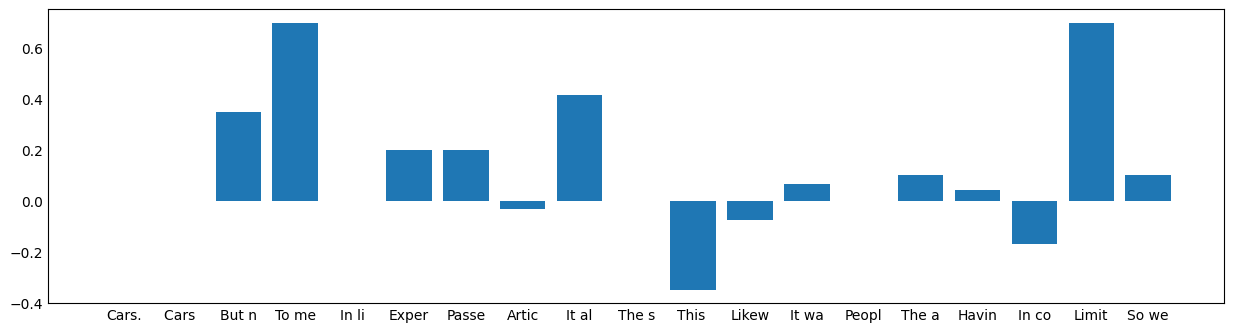

In [ ]:
'''

Here after the sentiment polarity of the first text in the dataset. It was made is a division by phrase. It is quiete clear how polarity of
phrases is directed towards the positivity, that indicates a general positive text.
This is partially confirmed from the result of the calculus of the sentiment polarity over the entire text.

Di seguito la sentiment polarity del primo testo presente nel dataset. E' stata implementata una suddivisione per frase. E' abbastanza evidente come
la polarità delle frasi siano spostate verso la positività, il che indica un testo in generale positivo.
Ciò è in parte confermato dal risultato del calcolo della sentiment polarity sull'intero testo.

'''

sentences_polarity = []
sentences = []
sentences_pol = {}

for sentence in blob.sentences:
    sentence_polarity = sentence.sentiment.polarity
    sentences_polarity.append(sentence_polarity)
    sentences.append(str(sentence))
    sentences_pol[str(sentence)[:5]] = sentence_polarity

print(round(blob.sentiment.polarity, 3))


fig, ax = plt.subplots(1, 1, figsize=(12, 3))

ax = plt.bar(sentences_pol.keys(), sentences_pol.values())
plt.grid(False)


plt.show()

In [ ]:
sentences_pol

{'Cars.': 0.0,
 'Cars ': 0.0,
 'But n': 0.35,
 'To me': 0.7,
 'In li': 0.0,
 'Exper': 0.20000000000000004,
 'Passe': 0.2,
 'Artic': -0.031249999999999997,
 'It al': 0.4166666666666667,
 'The s': 0.0,
 'This ': -0.3499999999999999,
 'Likew': -0.075,
 'It wa': 0.06666666666666667,
 'Peopl': 0.0,
 'The a': 0.09971590909090909,
 'Havin': 0.04055555555555554,
 'In co': -0.16921296296296295,
 'Limit': 0.7,
 'So we': 0.1}

**Sentiment Analyzer**

In [ ]:
#print of the first line of text

sample = df['text'][0]
print('First text: \n\n', sample)

#instantiation of sentiment analyzer

vader = SentimentIntensityAnalyzer()

#let's check the polarity of the sample

print('\n\nLet\'s check the polarity of the sample:')
vader.polarity_scores(sample)

First text: 

 Cars. Cars have been around since they became famous in the 1900s, when Henry Ford created and built the first ModelT. Cars have played a major role in our every day lives since then. But now, people are starting to question if limiting car usage would be a good thing. To me, limiting the use of cars might be a good thing to do.

In like matter of this, article, "In German Suburb, Life Goes On Without Cars," by Elizabeth Rosenthal states, how automobiles are the linchpin of suburbs, where middle class families from either Shanghai or Chicago tend to make their homes. Experts say how this is a huge impediment to current efforts to reduce greenhouse gas emissions from tailpipe. Passenger cars are responsible for 12 percent of greenhouse gas emissions in Europe...and up to 50 percent in some carintensive areas in the United States. Cars are the main reason for the greenhouse gas emissions because of a lot of people driving them around all the time getting where they need to

{'neg': 0.051, 'neu': 0.862, 'pos': 0.086, 'compound': 0.9643}

It is clear how the polarity is absolutly neutral (**86,2 %**), instead of negative (**0,05%**) or positive (**0,086%**)

In [ ]:
#polarity scores

polarity_scores = []
for text in df['text']:
 if type(text)==str:
    polarity_scores.append(vader.polarity_scores(text))

df['polarity_scores'] = polarity_scores

In [ ]:
df

,id,prompt_id,text,generated,polarity_scores
0,0059830c,0,Cars. Cars have been around since they became ...,0,"{'neg': 0.051, 'neu': 0.862, 'pos': 0.086, 'co..."
1,005db917,0,Transportation is a large necessity in most co...,0,"{'neg': 0.05, 'neu': 0.907, 'pos': 0.043, 'com..."
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,"{'neg': 0.044, 'neu': 0.837, 'pos': 0.118, 'co..."
3,00940276,0,How often do you ride in a car? Do you drive a...,0,"{'neg': 0.051, 'neu': 0.838, 'pos': 0.111, 'co..."
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,"{'neg': 0.12, 'neu': 0.769, 'pos': 0.11, 'comp..."
...,...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0,"{'neg': 0.051, 'neu': 0.778, 'pos': 0.171, 'co..."
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0,"{'neg': 0.083, 'neu': 0.823, 'pos': 0.094, 'co..."
1375,ffa247e0,0,There's a new trend that has been developing f...,0,"{'neg': 0.025, 'neu': 0.893, 'pos': 0.083, 'co..."
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0,"{'neg': 0.058, 'neu': 0.851, 'pos': 0.091, 'co..."


In [ ]:
#regex pattern for negative, neutral and positive expressions

pattern = r"'neg': (?P<neg>\d+\.\d+), 'neu': (?P<neu>\d+\.\d+), 'pos': (?P<pos>\d+\.\d+)"

#function to extract values
def extract_sentiment_values(sentiment_str):

    match = re.search(pattern, str(sentiment_str))

    if match:
        neg_value = float(match.group('neg'))
        neu_value = float(match.group('neu'))
        pos_value = float(match.group('pos'))
        return pd.Series({'Negative': neg_value, 'Neutral': neu_value, 'Positive': pos_value})

    else:
        return pd.Series({'Negative': None, 'Neutral': None, 'Positive': None})

#apply the function to each row of the df
df[['Negative', 'Neutral', 'Positive']] = df['polarity_scores'].apply(extract_sentiment_values)

In [ ]:
df

,id,prompt_id,text,generated,polarity_scores,Negative,Neutral,Positive
0,0059830c,0,Cars. Cars have been around since they became ...,0,"{'neg': 0.051, 'neu': 0.862, 'pos': 0.086, 'co...",0.051,0.862,0.086
1,005db917,0,Transportation is a large necessity in most co...,0,"{'neg': 0.05, 'neu': 0.907, 'pos': 0.043, 'com...",0.050,0.907,0.043
2,008f63e3,0,"""America's love affair with it's vehicles seem...",0,"{'neg': 0.044, 'neu': 0.837, 'pos': 0.118, 'co...",0.044,0.837,0.118
3,00940276,0,How often do you ride in a car? Do you drive a...,0,"{'neg': 0.051, 'neu': 0.838, 'pos': 0.111, 'co...",0.051,0.838,0.111
4,00c39458,0,Cars are a wonderful thing. They are perhaps o...,0,"{'neg': 0.12, 'neu': 0.769, 'pos': 0.11, 'comp...",0.120,0.769,0.110
...,...,...,...,...,...,...,...,...
1373,fe6ff9a5,1,There has been a fuss about the Elector Colleg...,0,"{'neg': 0.051, 'neu': 0.778, 'pos': 0.171, 'co...",0.051,0.778,0.171
1374,ff669174,0,Limiting car usage has many advantages. Such a...,0,"{'neg': 0.083, 'neu': 0.823, 'pos': 0.094, 'co...",0.083,0.823,0.094
1375,ffa247e0,0,There's a new trend that has been developing f...,0,"{'neg': 0.025, 'neu': 0.893, 'pos': 0.083, 'co...",0.025,0.893,0.083
1376,ffc237e9,0,As we all know cars are a big part of our soci...,0,"{'neg': 0.058, 'neu': 0.851, 'pos': 0.091, 'co...",0.058,0.851,0.091


**Probability** distribution

In [ ]:
#count and ordering of indexes

freq_distribution_neg = df['Negative'].value_counts().sort_index()
prob_distribution_neg = df['Negative'].value_counts().sort_index()/df.shape[0]

freq_distribution_neu = df['Neutral'].value_counts().sort_index()
prob_distribution_neu = df['Neutral'].value_counts().sort_index()/df.shape[0]

freq_distribution_pos = df['Positive'].value_counts().sort_index()
prob_distribution_pos = df['Positive'].value_counts().sort_index()/df.shape[0]


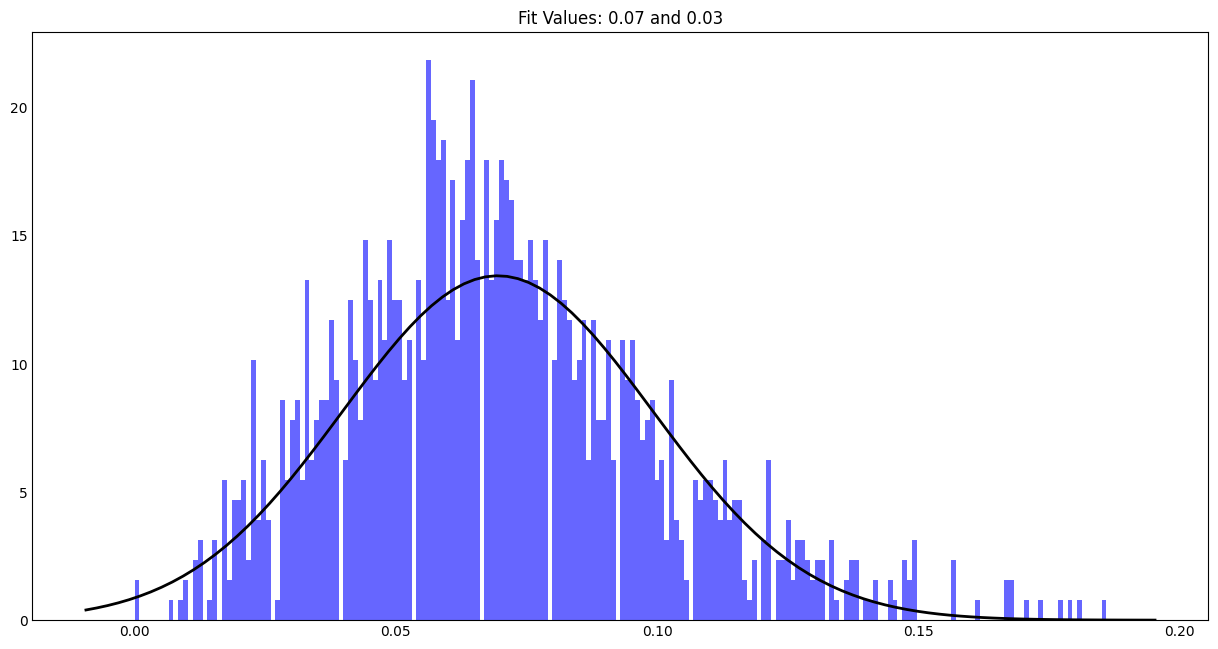

In [ ]:
#mean and standard deviation
mu_neg, std_neg = norm.fit(df['Negative'])

#plot the histogram
plt.hist(df['Negative'], bins=200, density=True, alpha=0.6, color='b')

#plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_neg, std_neg)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu_neg, std_neg)
plt.title(title)

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.grid(False)

plt.show()


Since the sample probability distribution is nothing but a normalized frequency distribution, one can compute it without problems and plotting the same (normalized) graph.

It is obvious, but it's worth saying, how the two graphs are completly superimposable.

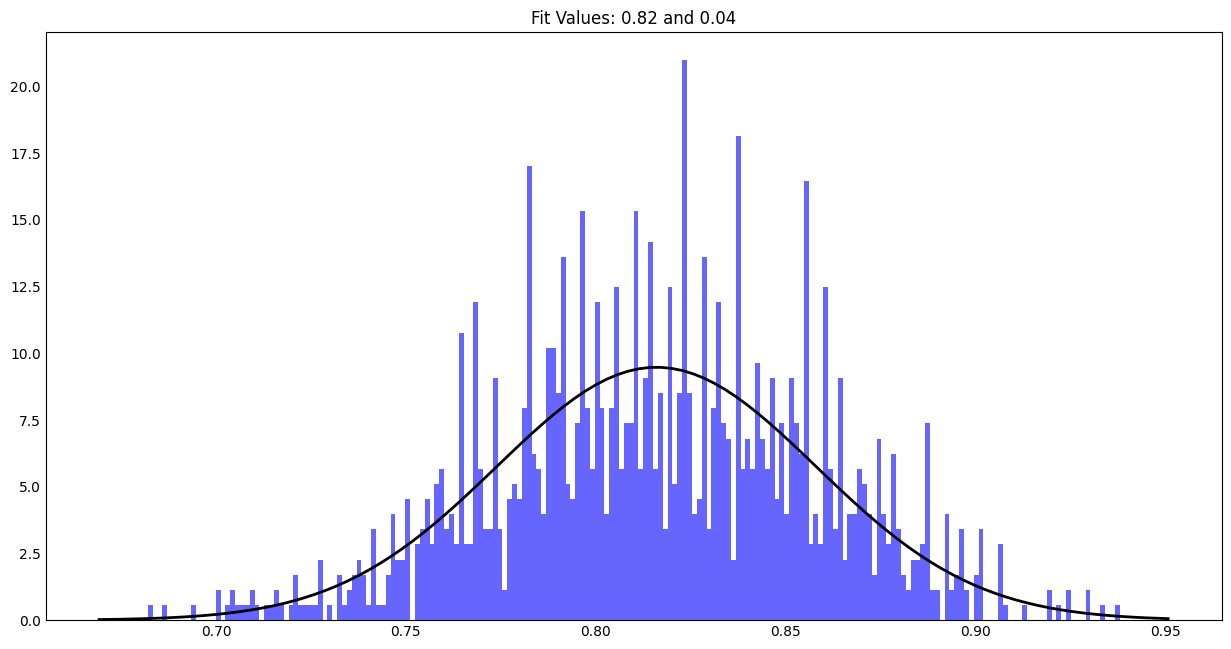

In [ ]:
#mean and standard deviation
mu_neg, std_neg = norm.fit(df['Neutral'])

#plot the histogram
plt.hist(df['Neutral'], bins=200, density=True, alpha=0.6, color='b') #one can vary the number of bins to obtain more precise results

#plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_neg, std_neg)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu_neg, std_neg)
plt.title(title)

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.grid(False)

plt.show()

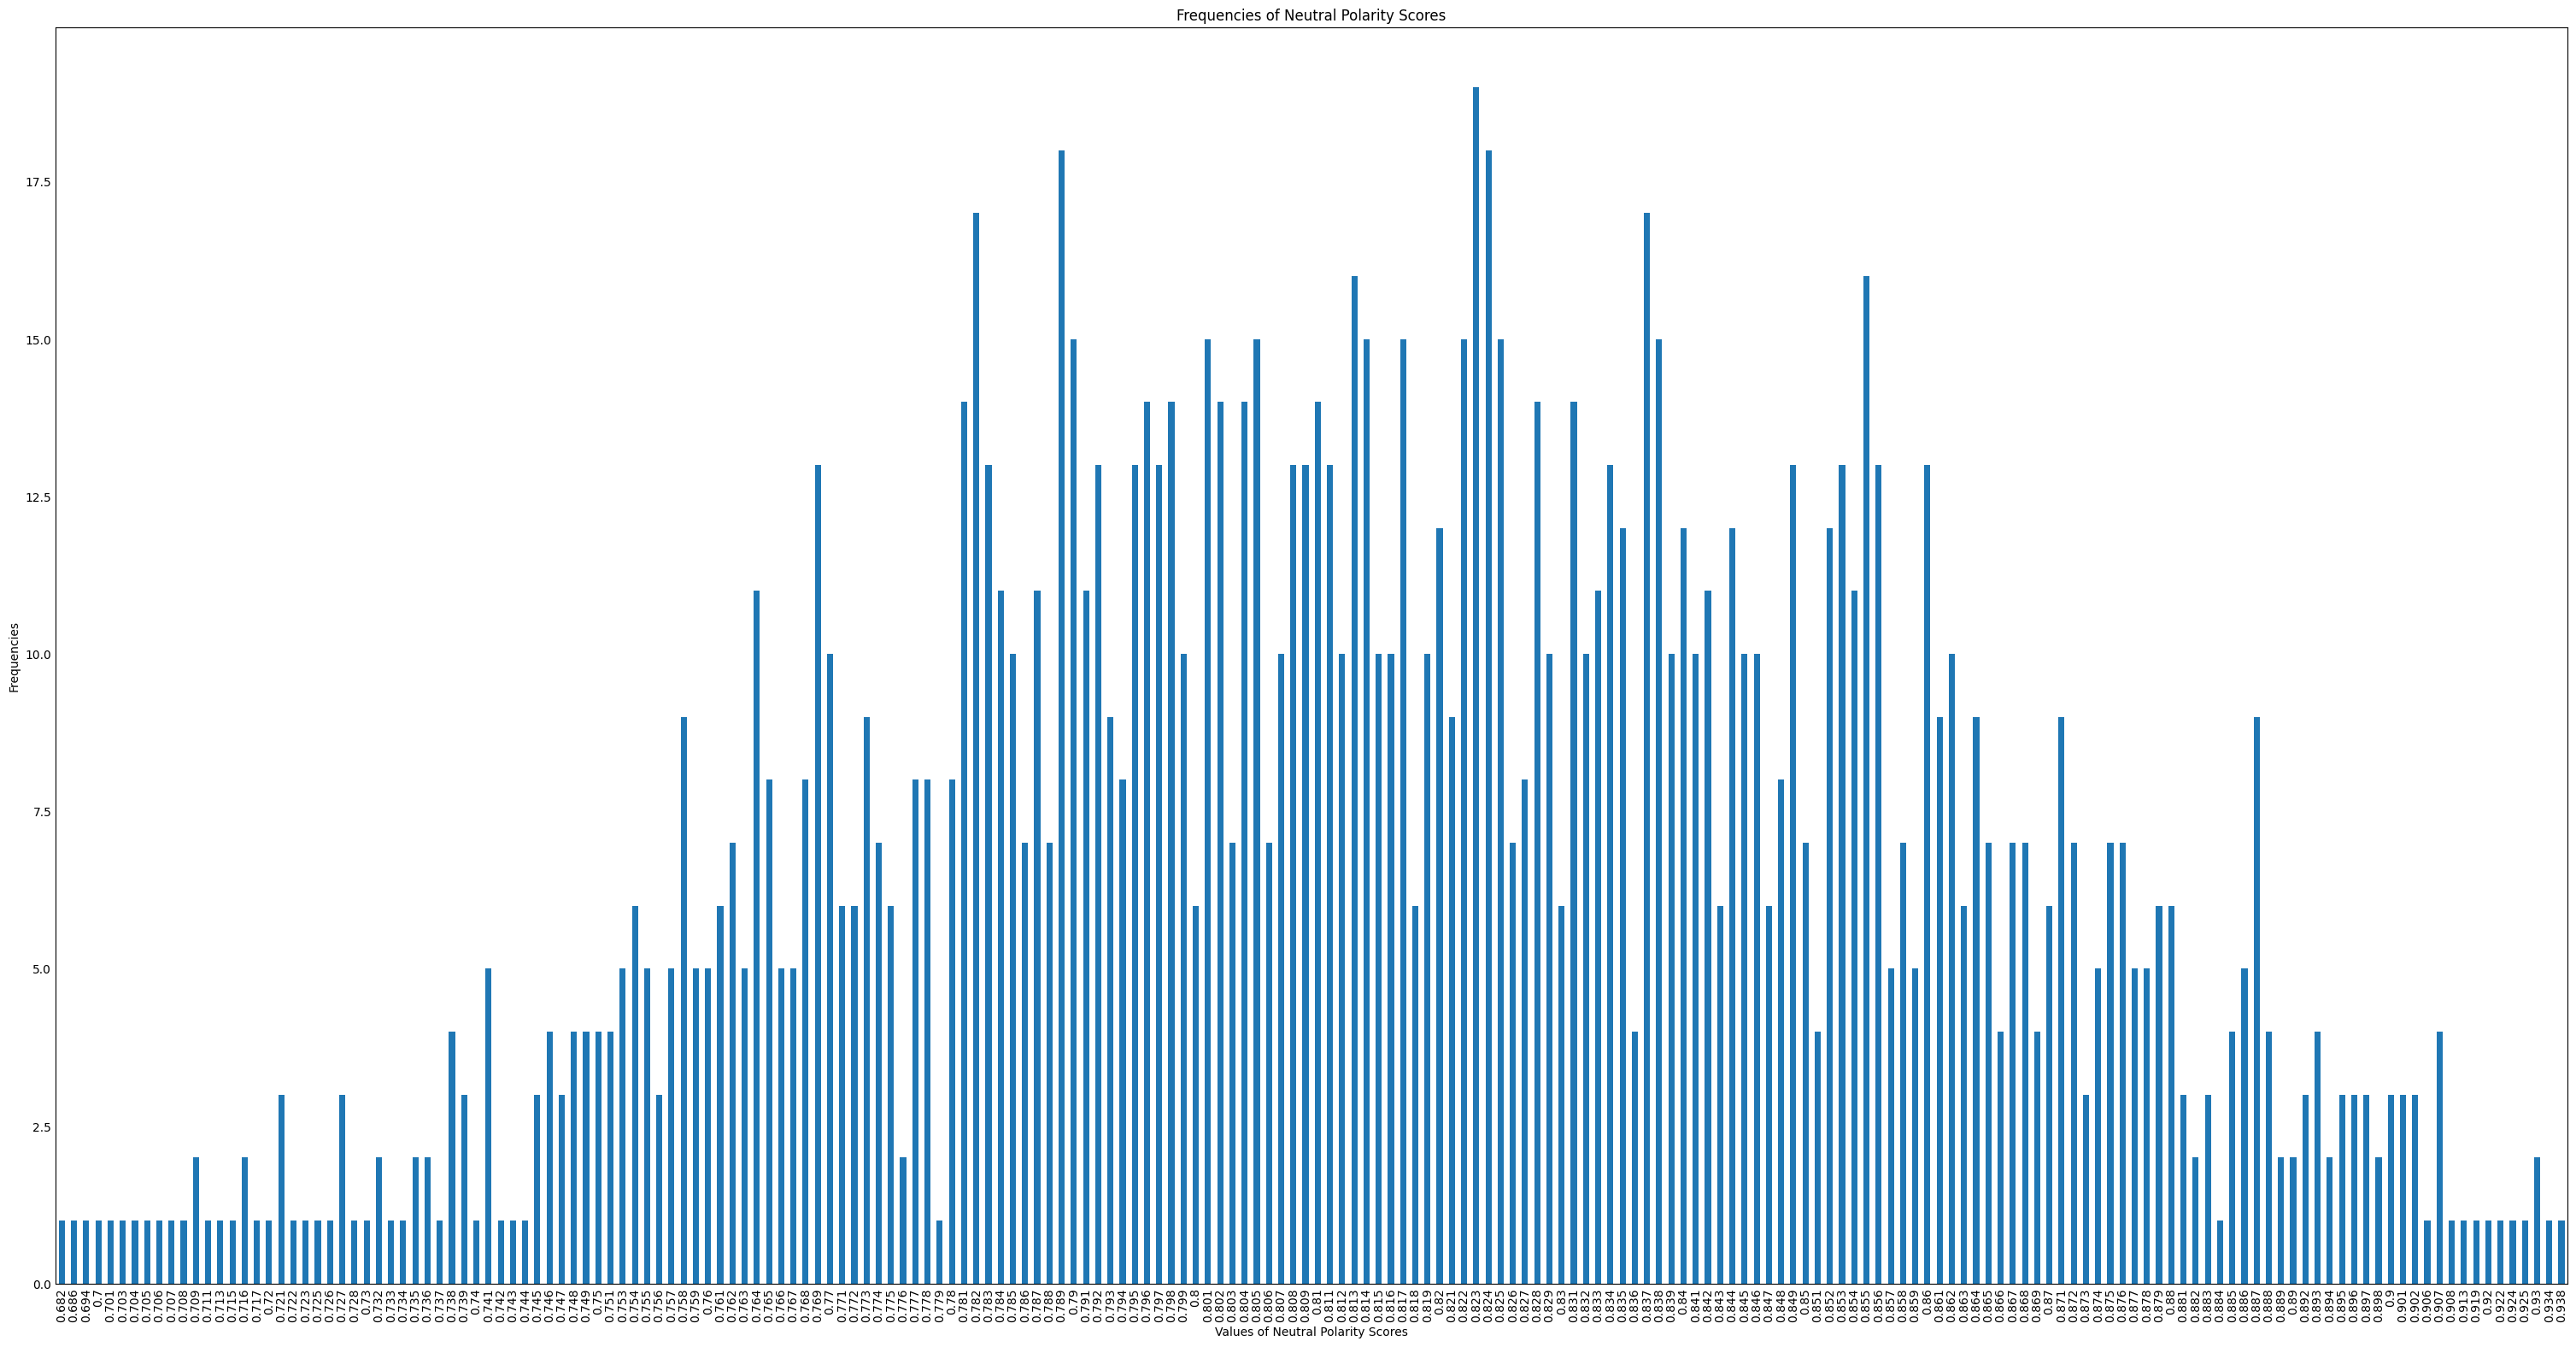

In [ ]:
#bar graph of neutral frequencies

plt.figure(figsize=(30, 15))
freq_distribution_neu = freq_distribution_neu.plot(kind='bar')
plt.title('Frequencies of Neutral Polarity Scores')
plt.xlabel('Values of Neutral Polarity Scores')
plt.ylabel('Frequencies')
plt.grid(False)
plt.show()

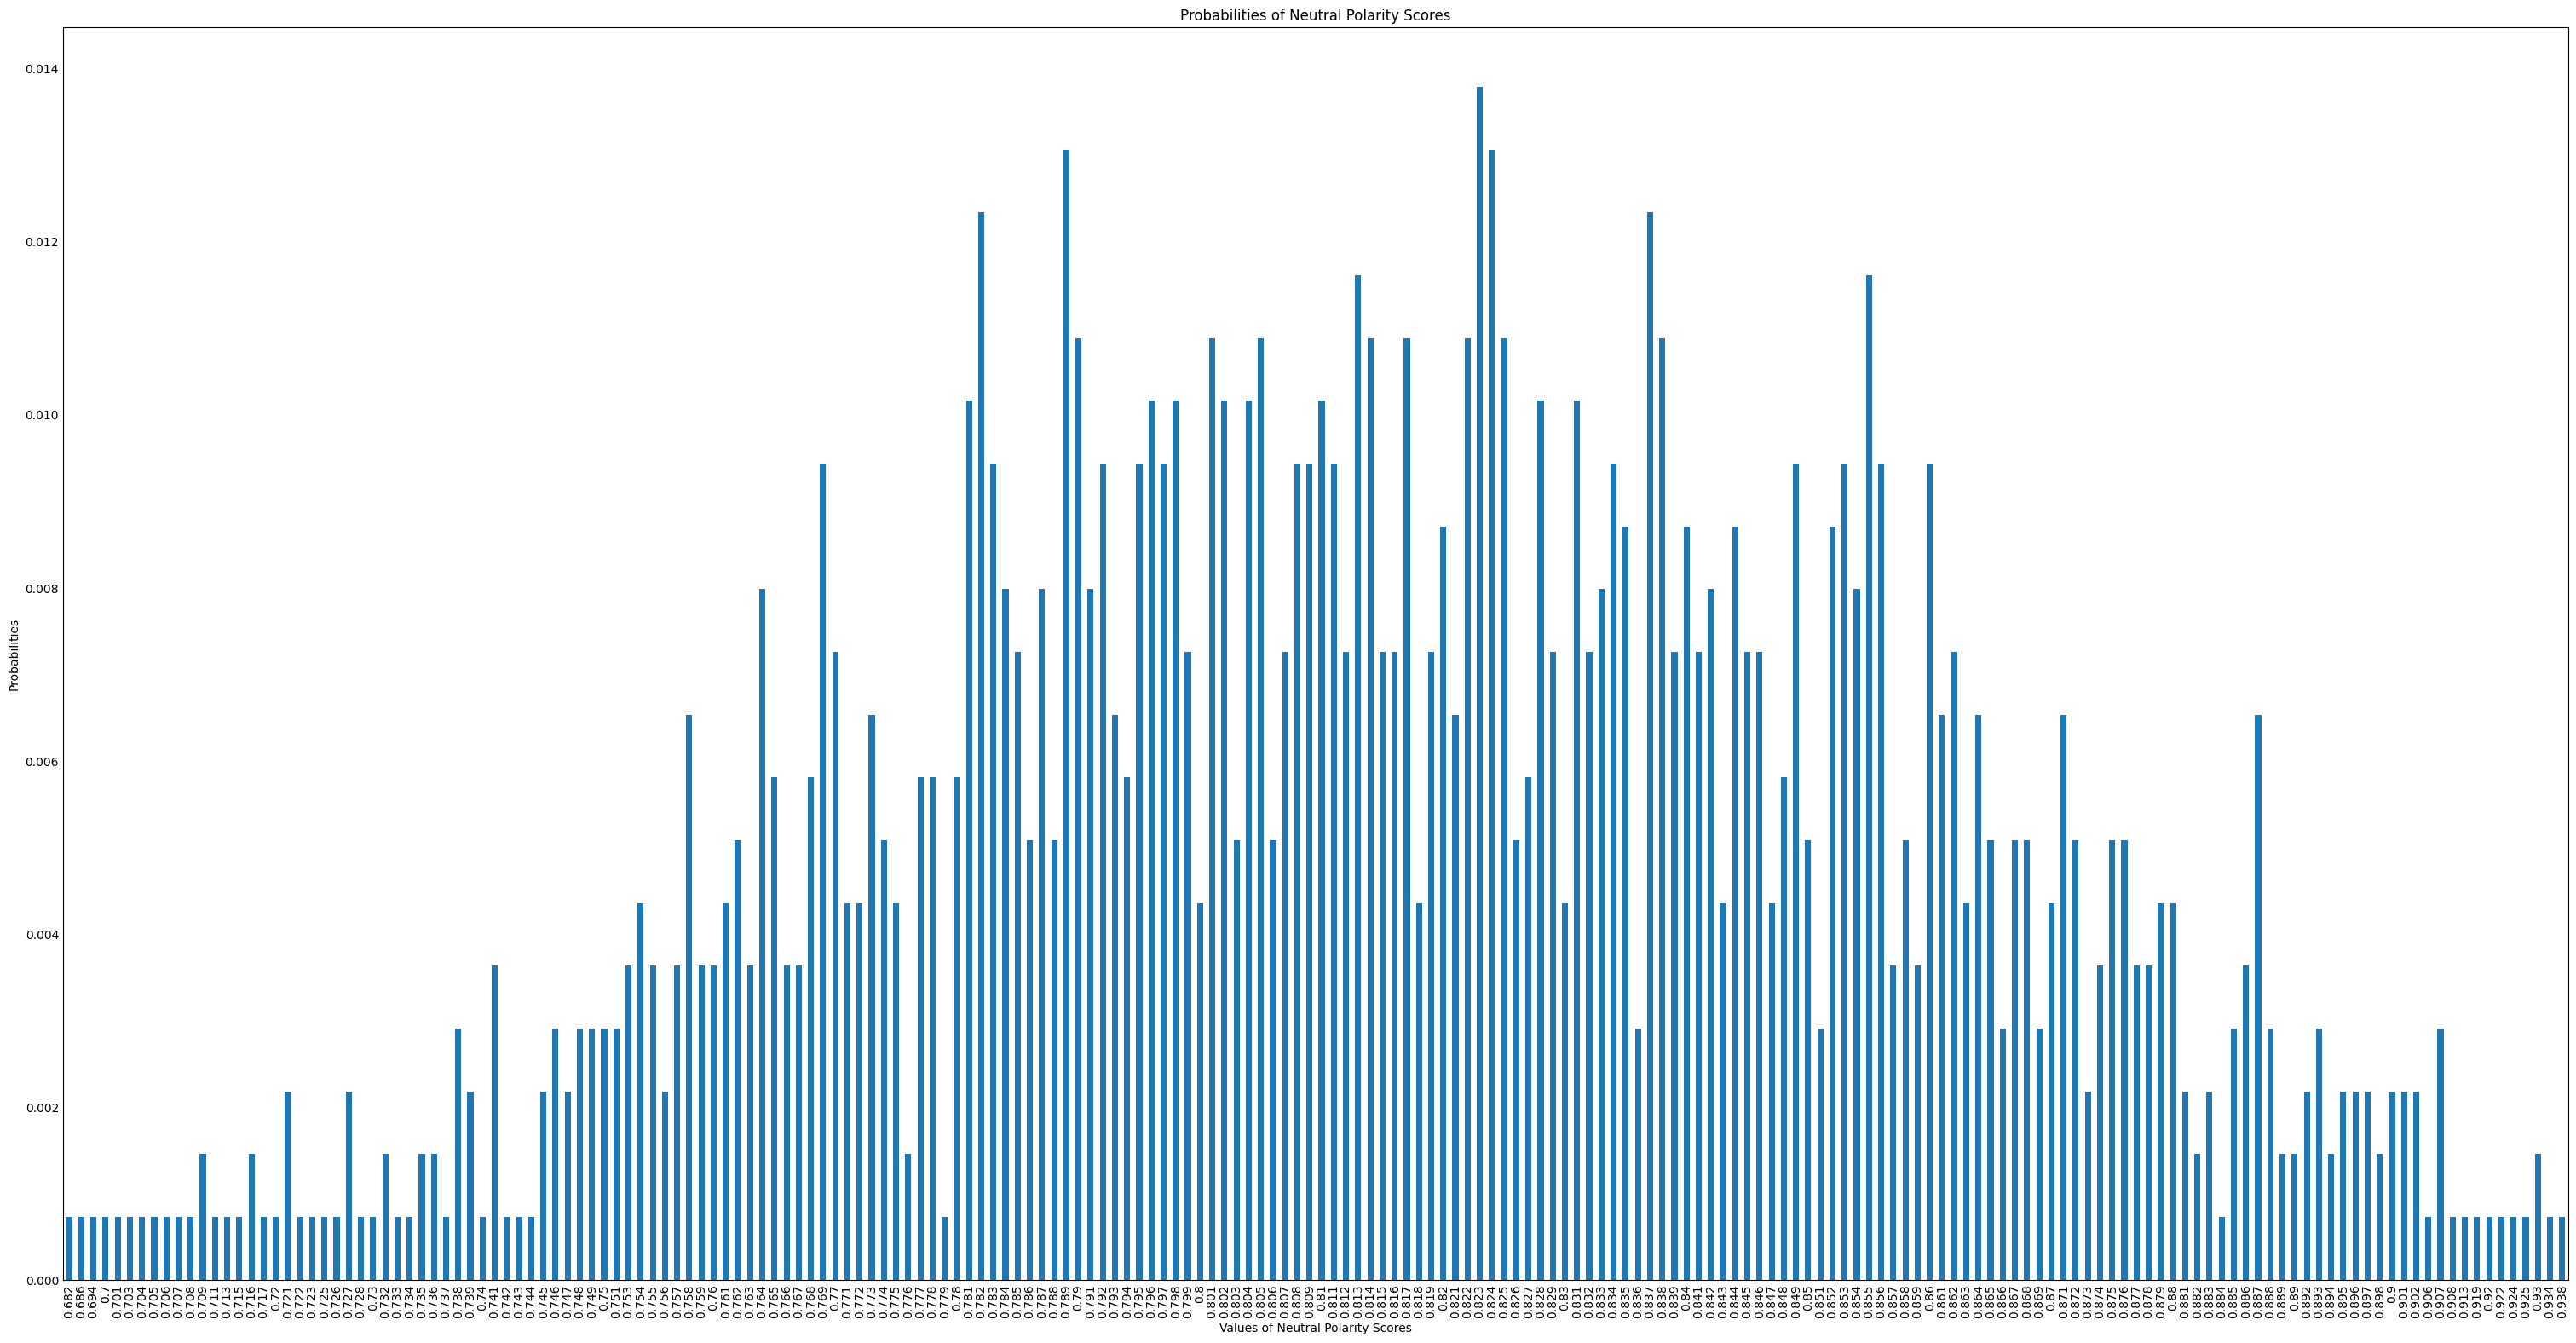

In [ ]:
#bar graph of neutral polarity scores

plt.figure(figsize=(30, 15))
prob_distribution_neu = prob_distribution_neu.plot(kind='bar')
plt.title('Probabilities of Neutral Polarity Scores')
plt.xlabel('Values of Neutral Polarity Scores')
plt.ylabel('Probabilities')
plt.grid(False)
plt.show()

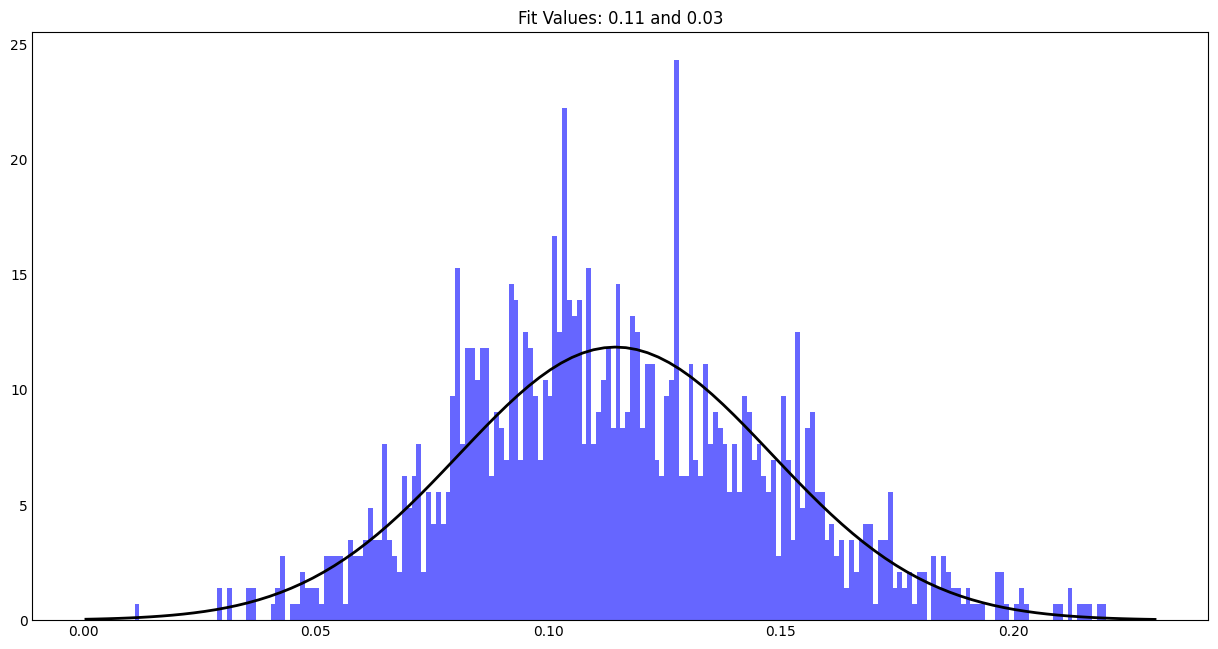

In [ ]:
#mean and standard deviation
mu_neg, std_neg = norm.fit(df['Positive'])

#plot the histogram
plt.hist(df['Positive'], bins=200, density=True, alpha=0.6, color='b') #one can vary the number of bins to obtain more precise results

#plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu_neg, std_neg)

plt.plot(x, p, 'k', linewidth=2)
title = "Fit Values: {:.2f} and {:.2f}".format(mu_neg, std_neg)
plt.title(title)

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.grid(False)

plt.show()

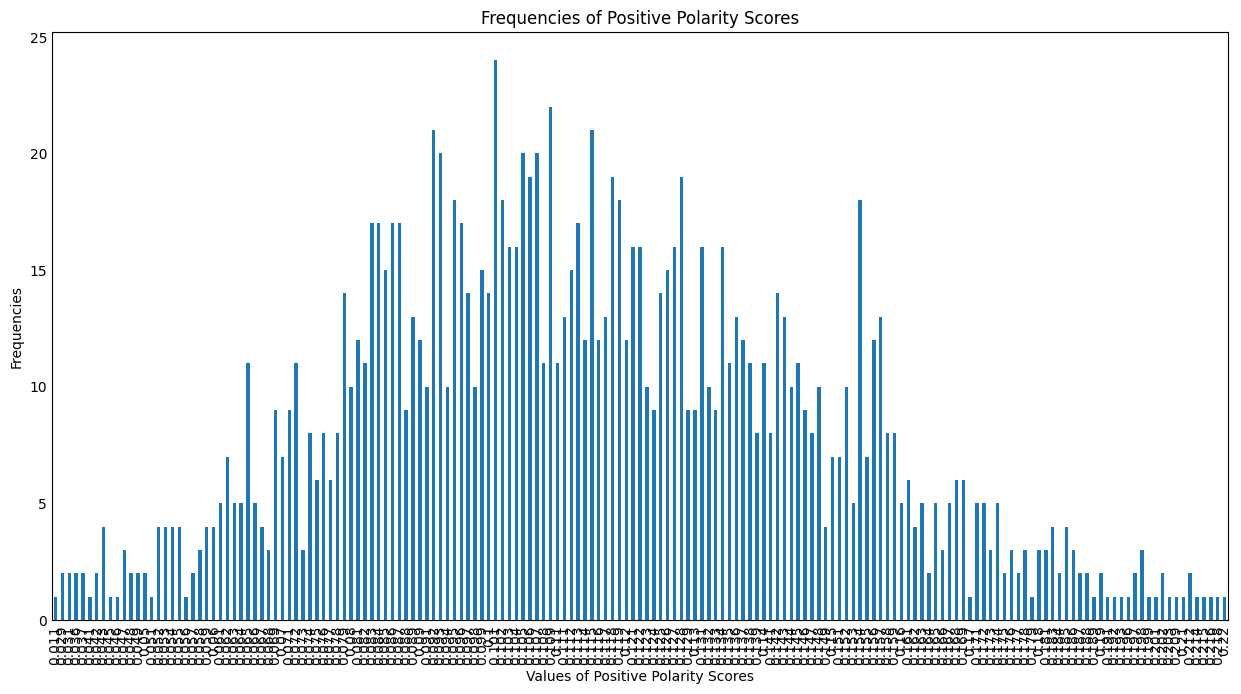

In [ ]:
#bar graph of positive frequencies

plt.figure(figsize=(30, 15))
freq_distribution_pos = freq_distribution_pos.plot(kind='bar')
plt.title('Frequencies of Positive Polarity Scores')
plt.xlabel('Values of Positive Polarity Scores')
plt.ylabel('Frequencies')

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.grid(False)

plt.show()

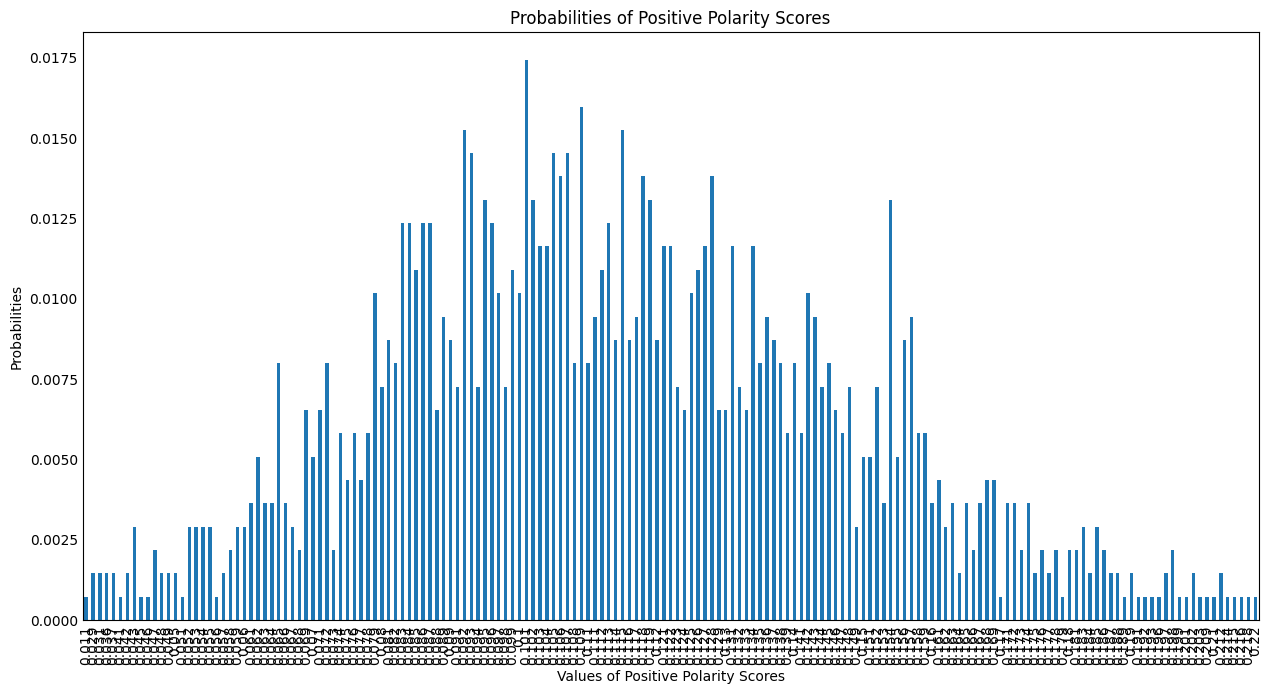

In [ ]:
#bar graph of positive polarity scores

plt.figure(figsize=(30, 15))
prob_distribution_pos = prob_distribution_pos.plot(kind='bar')
plt.title('Probabilities of Positive Polarity Scores')
plt.xlabel('Values of Positive Polarity Scores')
plt.ylabel('Probabilities')

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.grid(False)

plt.show()

In [ ]:
import numpy as np
length = []

for j in range(len(df['text'])):
    length.append(len(df['text'][j]))

mean_len = np.mean(length)

In [ ]:
mean_len

3169.0507982583454

**AI generated text counter**

In [ ]:
count = 0

for i in range(len(df)):
    if df['generated'][i] == 1:
        count += 1

print(count)


3


In [ ]:
df.describe()

,prompt_id,generated,Negative,Neutral,Positive
count,1378.000000,1378.000000,1378.000000,1378.000000,1378.000000
mean,0.486212,0.002177,0.069518,0.816018,0.114433
std,0.499991,0.046625,0.029702,0.042129,0.033674
min,0.000000,0.000000,0.000000,0.682000,0.011000
25%,0.000000,0.000000,0.049000,0.787000,0.091000
50%,0.000000,0.000000,0.067000,0.816000,0.112000
75%,1.000000,0.000000,0.086000,0.846000,0.137000
max,1.000000,1.000000,0.186000,0.938000,0.220000


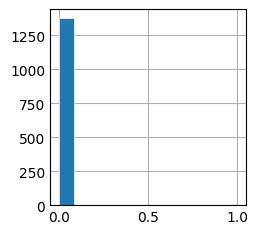

In [ ]:
plt.style.use('_mpl-gallery')

#plot:
fig, ax = plt.subplots()

ax.hist(df['generated'], bins = 'auto', linewidth=0.5, edgecolor="white")

plt.show()

In [ ]:
#create a pivot table
pivot_table = df.pivot_table(values='generated', index='Positive', aggfunc='sum')

#display the pivot table
print(pivot_table)

          generated
Positive           
0.011             0
0.029             0
0.031             0
0.036             0
0.037             0
...             ...
0.214             0
0.215             0
0.216             0
0.218             0
0.220             0

[171 rows x 1 columns]


The content of the analyzed text is mainly neutral, with no difference among the **AI generated** and the **not AI generated** in terms of gradient.


**Machine Learning to Predict Generated / Not Generated Text from AI**

In [ ]:
#copy of the df in order to use it for ML modeling
df_ml = df.copy()

#dropping uneseful columns
df_ml = df_ml.drop(columns = ['id', 'text', 'polarity_scores'])

#saving the target variable and dropping it from the X df
y = df_ml['generated']
df_ml = df_ml.drop(columns = ['generated'])

In [ ]:
df_ml

,prompt_id,Negative,Neutral,Positive
0,0,0.051,0.862,0.086
1,0,0.050,0.907,0.043
2,0,0.044,0.837,0.118
3,0,0.051,0.838,0.111
4,0,0.120,0.769,0.110
...,...,...,...,...
1373,1,0.051,0.778,0.171
1374,0,0.083,0.823,0.094
1375,0,0.025,0.893,0.083
1376,0,0.058,0.851,0.091


In [ ]:
#train/test splitting

X_train, X_test, y_train, y_test = train_test_split(df_ml, y, test_size = 0.25)

In [ ]:
#import libraries

from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
#SGD Classifier

sgd_clf = SGDClassifier().fit(X_train, y_train)
score_sgd = sgd_clf.score(X_test, y_test)
print('The score for the {} model is {}'.format(sgd_clf, score_sgd.round(3)))

The score for the SGDClassifier() model is 0.997


In [ ]:
#Random Forest Classifier

rf_clf = RandomForestClassifier(n_estimators = 10000).fit(X_train, y_train)
score_rf = sgd_clf.score(X_test, y_test)
print('The score for the {} model is {}'.format(rf_clf, score_rf.round(3)))

feature_importance = rf_clf.feature_importances_
print()

#feature importance
for feature, importance in zip(X_train.columns, feature_importance):
    print(f'{feature}: {importance}')

The score for the RandomForestClassifier(n_estimators=10000) model is 0.997

prompt_id: 0.022198804027249452
Negative: 0.39993661259986146
Neutral: 0.26336025069168933
Positive: 0.31450433268119976


In [ ]:
#Gradient Boosting Classifier

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
score_gb = gb_clf.score(X_test, y_test)
print('The score for the {} model is {}'.format(gb_clf, score_gb.round(3)))

feature_importance = gb_clf.feature_importances_
print()

#feature importance
for feature, importance in zip(X_train.columns, feature_importance):
    print(f'{feature}: {importance}')

The score for the GradientBoostingClassifier(random_state=0) model is 0.994

prompt_id: 0.0
Negative: 0.19327831237934184
Neutral: 0.15176024367508242
Positive: 0.6549614439455758


In [ ]:
#AdaBoost Classifier

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=0).fit(X_train, y_train)
score_ada = ada_clf.score(X_test, y_test)
print('The score for the {} model is {}'.format(ada_clf, score_ada.round(3)))

feature_importance = ada_clf.feature_importances_
print()

#feature importance
for feature, importance in zip(X_train.columns, feature_importance):
    print(f'{feature}: {importance}')

The score for the AdaBoostClassifier(n_estimators=100, random_state=0) model is 0.994

prompt_id: 0.0
Negative: 0.27
Neutral: 0.14
Positive: 0.59


**TfIdf**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

vectorized_text = []

X = vectorizer.fit_transform(df['text'])
vec = vectorizer.get_feature_names_out()
vectorized_text.append(vec)

In [ ]:
vectorizer.get_feature_names_out()

array(['00', '000', '00000001', ..., 'zoom', 'zooming', 'zroom'],
      dtype=object)

**Correlation Matrix**

In [ ]:
df_corr = df.drop(columns = ['id', 'text', 'polarity_scores'])

In [ ]:
df_corr

,prompt_id,generated,Negative,Neutral,Positive
0,0,0,0.051,0.862,0.086
1,0,0,0.050,0.907,0.043
2,0,0,0.044,0.837,0.118
3,0,0,0.051,0.838,0.111
4,0,0,0.120,0.769,0.110
...,...,...,...,...,...
1373,1,0,0.051,0.778,0.171
1374,0,0,0.083,0.823,0.094
1375,0,0,0.025,0.893,0.083
1376,0,0,0.058,0.851,0.091


In [ ]:
df['prompt_id']

0       0
1       0
2       0
3       0
4       0
       ..
1373    1
1374    0
1375    0
1376    0
1377    0
Name: prompt_id, Length: 1378, dtype: int64

<Axes: >

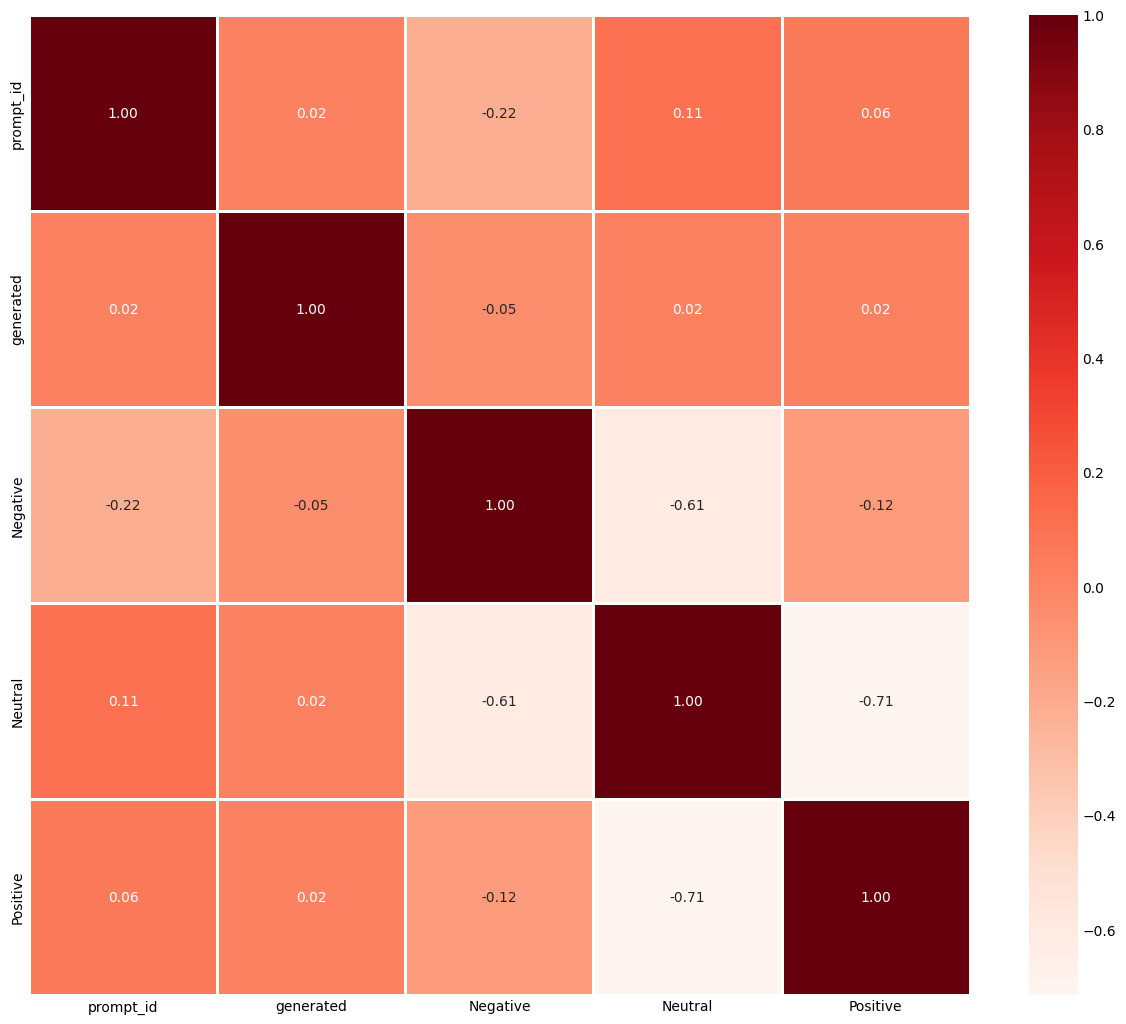

In [ ]:
#heatmap to visualize the correlation

plt.figure(figsize=(12, 10))

correlation = df_corr.corr()
sns.heatmap(correlation, annot=True, cmap='Reds', fmt=".2f", linewidths=1)

**Key facts:**

- the label generated doesn't seem to be correlated with any of the values **'Negative'**, **'Neutral'** or **'Positive'**. This means that the generated AI text doesn't assume a "sentiment polarity", nor is neutral.
- there is a slightly negative correlation between the prompt_id and the **'Negative'** polarity. This means that the prompt_id '1' is premise of a more **'Negative'** essay.
- the most extreme correlations are among the **'Neutral'** with **'Negative'**  or **'Positive'** polarities, while **'Positive'** and **'Negative'** are not highly (positively or negatively) correlated.